# LDATA2010: Information Visualisation
## TP1: Graphic Design and Critique

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Ex 4: Debt

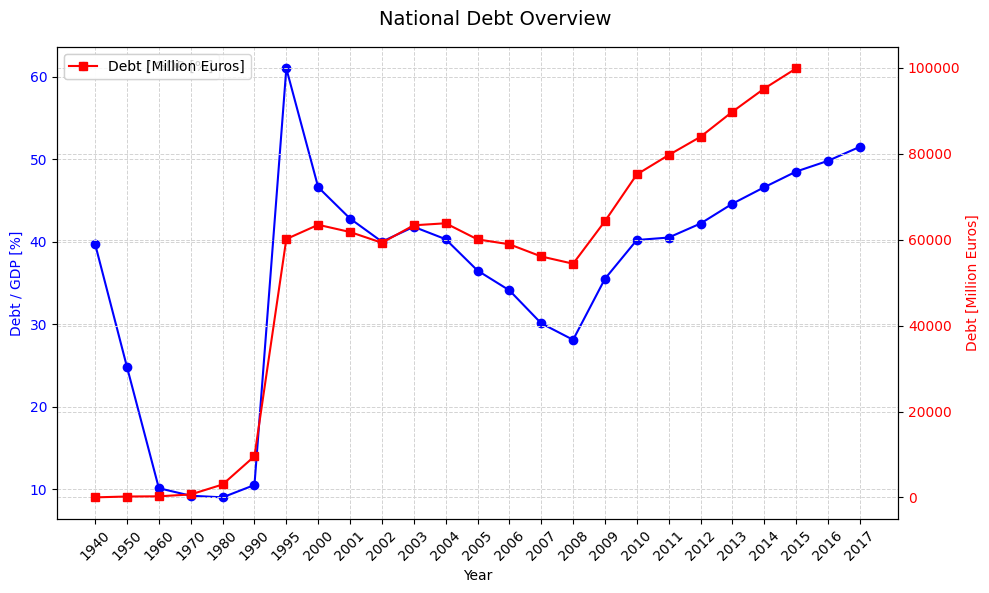

In [28]:
# Load datas
debt = pd.read_csv('Datas/debt.txt', sep=',', header=0)
debt = debt.iloc[2:]

years = debt['# year']
debt_million = debt[' debt in million euros']
debt_gdp = debt[' debt / GDP %']


# Plotting results
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.suptitle('National Debt Overview', fontsize=14)
plt.xticks(rotation=45)

ax1.plot(years, debt_gdp, color='blue', marker='o', label="Debt / GDP [%]")
ax1.set_xlabel('Year')
ax1.set_ylabel('Debt / GDP [%]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(color='lightgray', linestyle='--', linewidth=0.7)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(years, debt_million, color='red', marker='s', label="Debt [Million Euros]")
ax2.set_ylabel('Debt [Million Euros]', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# ax2.set_yscale('log') # Decomment this line to believe that the debt increases very slowly
ax2.grid(color='lightgray', linestyle='--', linewidth=0.7)
ax2.legend(loc="upper left")

plt.tight_layout()
plt.savefig("Figures/debt_analysis.pdf")
plt.show()

### Ex5: Wine

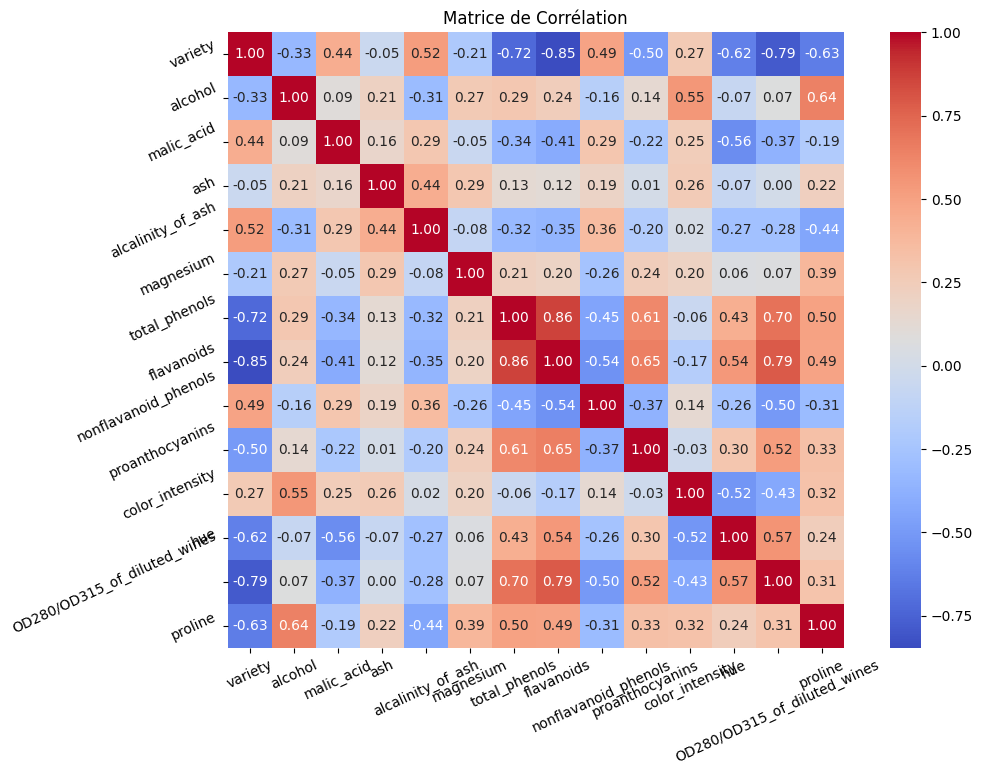

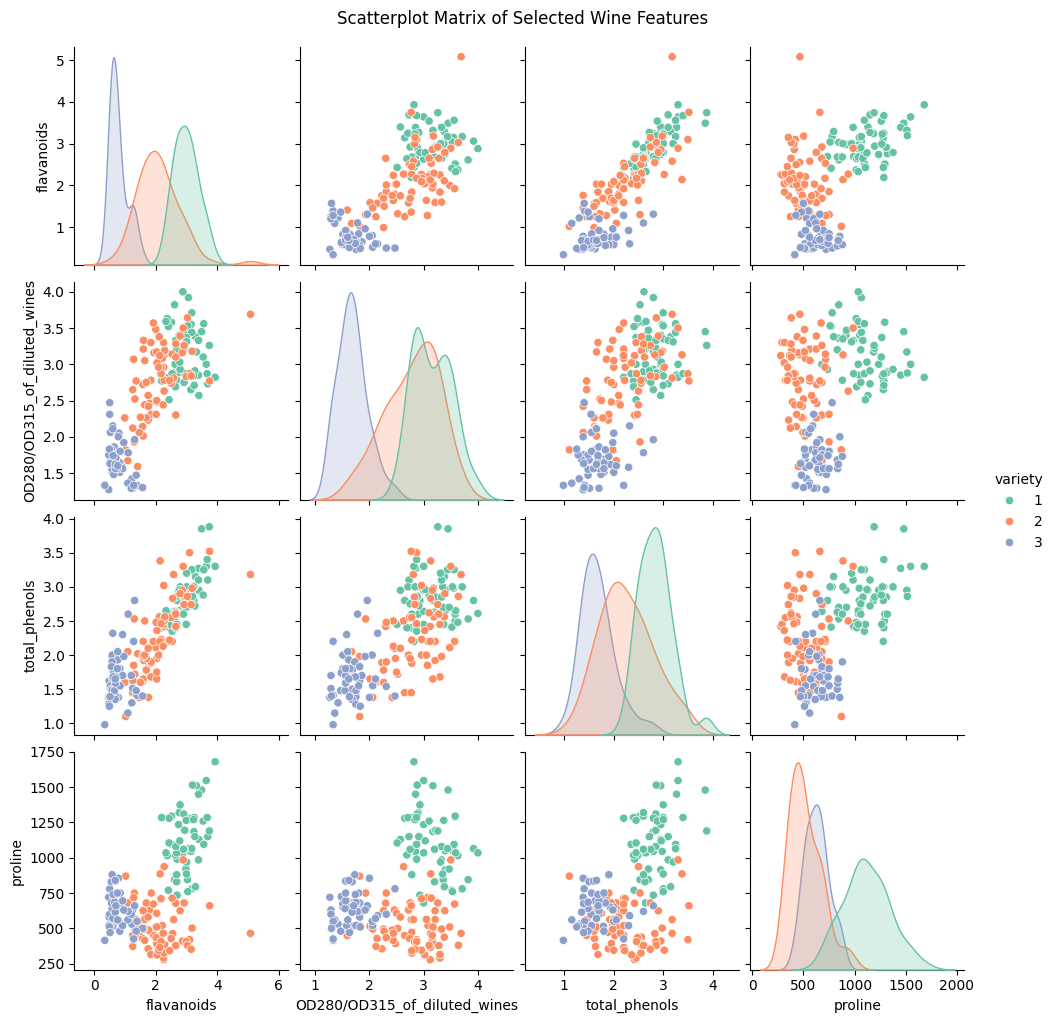

In [34]:
# Load datas
features = ["variety", "alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols", "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "OD280/OD315_of_diluted_wines", "proline"]
wine = pd.read_csv('Datas/wine.txt', sep=',', header=None, names=features)

# Plotting Correlation Matrix
corr_matrix = wine.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation')
plt.tick_params(rotation=25)
plt.savefig("Figures/correlation_matrix.pdf")
plt.show()

# Plotting results
nb_feats = 4
best_feats = abs(corr_matrix['variety']).sort_values(ascending=False)[1:nb_feats + 1].index.array
pair_plot = sns.pairplot(wine, hue='variety', vars=best_feats, palette='Set2')
pair_plot.fig.suptitle("Scatterplot Matrix of Selected Wine Features", y=1.02)
plt.savefig("Figures/scatterplot_matrix.pdf")
plt.show()